# Обработка данных и их визуализация

### Основные задачи работы

1) получение программного доступа к данным, содержащимся в источниках различного типа;

2) выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;

3) исследование простых методов визуализации данных;

4) изучение основных библиотек Python для работы с данными.

Для данной работы был использован массив данных - Титаник (https://www.kaggle.com/datasets/yasserh/titanic-dataset)

Он представляет собой набор данных о пассажирах знаменитого судна

### Описание колонок:

* PassengerId - Идентификатор пассажира
* Survived - Выжил ли: 0 = Нет, 1 = Да
* Pclass - Класс билета: 1 = 1-й, 2 = 2-й, 3 = 3-й
* Name - Имя пассажира
* Sex - Пол
* Age - Возраст в годах
* SibSp - Количество братьев/сестер / супругов на борту Титаника
* Parch - Количество родителей / детей на борту Титаника
* Ticket - Номер билета
* Fare - Стоимость билета
* Cabin - Номер каюты
* Embarked - Порт посадки: C = Шербур, Q = Квинстаун, S = Саутгемптон

Survived - целевая переменная (та, которую хотим предсказать с помощью модели)

## 1 шаг: получение программного доступа к данным, содержащимся в источниках различного типа

Приступим к первому шагу и попробуем считать данные датасета с помощью метода genfromtxt()

In [1]:
import numpy as np

data = np.genfromtxt('Titanic-Dataset.csv', delimiter=',', dtype=None, encoding='utf-8', skip_header=1)
print(data[:10])

[( 1, 0, 3, '"Braund', ' Mr. Owen Harris"', 'male', 22., 1, 0, 'A/5 21171',  7.25  , '', 'S')
 ( 2, 1, 1, '"Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)"', 'female', 38., 1, 0, 'PC 17599', 71.2833, 'C85', 'C')
 ( 3, 1, 3, '"Heikkinen', ' Miss. Laina"', 'female', 26., 0, 0, 'STON/O2. 3101282',  7.925 , '', 'S')
 ( 4, 1, 1, '"Futrelle', ' Mrs. Jacques Heath (Lily May Peel)"', 'female', 35., 1, 0, '113803', 53.1   , 'C123', 'S')
 ( 5, 0, 3, '"Allen', ' Mr. William Henry"', 'male', 35., 0, 0, '373450',  8.05  , '', 'S')
 ( 6, 0, 3, '"Moran', ' Mr. James"', 'male', nan, 0, 0, '330877',  8.4583, '', 'Q')
 ( 7, 0, 1, '"McCarthy', ' Mr. Timothy J"', 'male', 54., 0, 0, '17463', 51.8625, 'E46', 'S')
 ( 8, 0, 3, '"Palsson', ' Master. Gosta Leonard"', 'male',  2., 3, 1, '349909', 21.075 , '', 'S')
 ( 9, 1, 3, '"Johnson', ' Mrs. Oscar W (Elisabeth Vilhelmina Berg)"', 'female', 27., 0, 2, '347742', 11.1333, '', 'S')
 (10, 1, 2, '"Nasser', ' Mrs. Nicholas (Adele Achem)"', 'female', 14., 1, 

Данный набор представляет массив, состоящий из кортежей, описывающих каждого пассажира по критериям, указанным выше. 

Проанализируем количество данных:

In [2]:
print(data.shape)

(891,)


В данном случае наш датасет содержит 891 строку информации о пассажирах. Однако, в виду сложности считывания информации с использованием numpy. Для будущей простоты работы мной было принято решение превести датасет в более наглядный и удобный вид с помощью библиотеки pandas

In [3]:
import pandas as pd

data = pd.read_csv('Titanic-Dataset.csv', index_col = 'PassengerId')

print(data.shape)
data.head()

(891, 11)


C:\Users\nastya-pls\AppData\Local\Temp\ipykernel_9924\1424115821.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В данном виде будет комфортнее работать с данными датасета и анализировать его.

Мы сразу можем заметить размер нашего датасета - 891 пассажир и 11 колонок информации для каждого. 

## шаг 2: выполнение предварительного анализа данных и получение обобщенных характеристик наборов данных;

Также можем сразу заметить, что есть некоторые строки с пропущенным значениями в столбце "Cabin". Этот пропуск появился в связи с отсутствием данных, а не из-за неправильного считывания данных. К сожалению, не для всех пассажиров нам известны их каюты. Это следуюет учитывать при дальнейшем анализе данных и работе с данными.

Узнаем сколько таких строк есть в датасете:

In [4]:
missing_cabin = data['Cabin'].isna().sum()
print(f'Количество пропущенных значений в столбце "Cabin": {missing_cabin}')

Количество пропущенных значений в столбце "Cabin": 687


Мы имеем 687 строк с пропущенными значениями в столбце Cabin из 891 исходных строк датасета. Это достаточно много пропусков данных для одной характеристики, поэтому имеет смысл в дальнейшем не использовать эту характеристику при построении модели, так как она несет мало пользы

Проверим пропуски в остальных колонках:

In [5]:
missing_values = data.isna().sum()
print(missing_values)

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Как мы можем заметить есть пустые значения в колонках - Age и Embarked. Однако, их не так много, потому эти значения можно будет заменить в дальнейшем, используя метод ближайших соседей (то есть, к примеру, пропуски в возрасте можно будет заменить на возраст похожих по остальным критериям пассажирам). Таким образом, мы не уменьшим датасет и обеспечим будущую модель данными без пропусков

Мы проанализировали пропуски в данных.
Также можем рассмотреть структуру данных каждого столбца информации

In [6]:
data_types = data.dtypes
print(data_types)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object


Таким образом, всего количественны столбцов - 6, а категориальных столбцов - 5.
* количественные - Age, SibSp, Parch, Fare
* изначально категориальные, но уже закодированные данные - Survived, Pclass
* категориальные - Name, Sex, Ticket, Cabin, Embarked 

Если в дальнейшем строить модель классификации, некоторые данные, а именно категориальные, придется векторизовать к количественному типу, так как модель классификации работает с количественными данными

Рассмотрим средние, максимальные и минимальные показатели количественных данных:

In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Таким образом, можем заметить, что выбросов и аномалий в данных не замечено

## шаг 3: исследование простых методов визуализации данных;

Проанализируем какие есть зависимости в данных с помощью графиков и визуализации данных. 

Сначала проанализуем зависимость выживаемости от пола пассажира. 

Воспользуемся гистограммой:

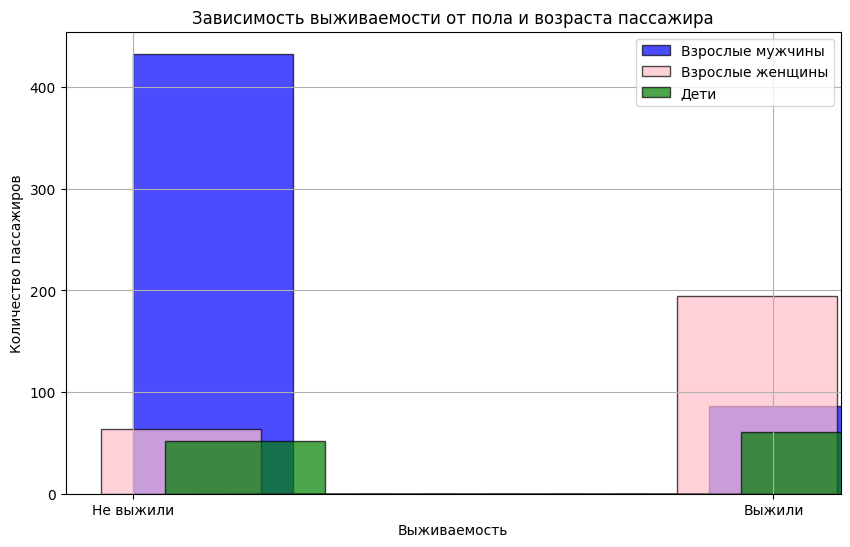

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

data['Age_Category'] = ['Дети' if age < 18 else 'Взрослые' for age in data['Age']]

plt.figure(figsize=(10, 6))
plt.hist(data[(data['Sex'] == 'male') & (data['Age_Category'] == 'Взрослые')]['Survived'], label='Взрослые мужчины', color='blue',alpha=0.7, width=0.25, align='mid',edgecolor='black')
plt.hist(data[(data['Sex'] == 'female') & (data['Age_Category'] == 'Взрослые')]['Survived'], label='Взрослые женщины', color='pink', alpha=0.7, width=0.25, align='left',edgecolor='black')
plt.hist(data[data['Age_Category'] == 'Дети']['Survived'], label='Дети', color='green',alpha=0.7, width=0.25, align='right',edgecolor='black')

plt.title('Зависимость выживаемости от пола и возраста пассажира')
plt.xlabel('Выживаемость')
plt.ylabel('Количество пассажиров')
plt.xticks([0, 1], ['Не выжили', 'Выжили'])
plt.legend()
plt.grid()
plt.show()


По данному графику можем заметить, что в катастрофе в первую очередь спасали женщин и детей. По данному графику большинство мужчин погибли вместе с небольшой частью женщин и детей. 

Отсюда простится зависимость выживаемости от возраста. Для нее также построим гистограмму:

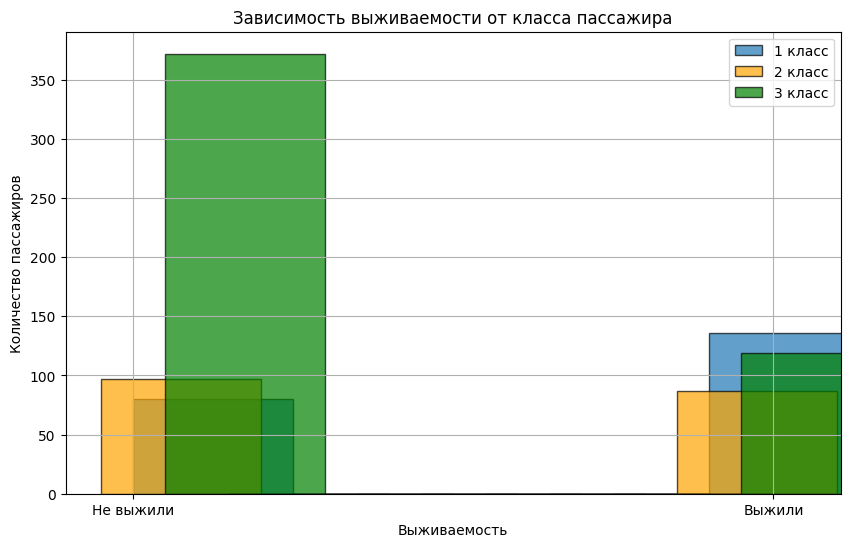

In [9]:
plt.figure(figsize=(10, 6))

plt.hist(data[data['Pclass'] == 1]['Survived'], label='1 класс', alpha=0.7, width=0.25, align='mid',edgecolor='black')
plt.hist(data[data['Pclass'] == 2]['Survived'], label='2 класс', alpha=0.7, width=0.25, align='left', color='orange', edgecolor='black')
plt.hist(data[data['Pclass'] == 3]['Survived'], label='3 класс', alpha=0.7, width=0.25, align='right', color='green', edgecolor='black')

plt.title('Зависимость выживаемости от класса пассажира')
plt.xlabel('Выживаемость')
plt.ylabel('Количество пассажиров')
plt.xticks([0, 1], ['Не выжили', 'Выжили'])
plt.legend()
plt.grid()
plt.show()


Таким образом, заметим, что большинство пассажиров 3 класса не выжили, а большинство выживших - пассажиры первого класса. 

Возможно пассажирам первого класса первым предлагали эвакуироваться на шлюпках, что вызвало большее количество их выживших. Однако, после могла начаться паника, из-за которой остальная часть пассажиров не смогла попасть на шлюпки и погибла с другими пассажирами

Можем определить зависимость возраста и стоимости билета с помощью диаграммы рассеивания:

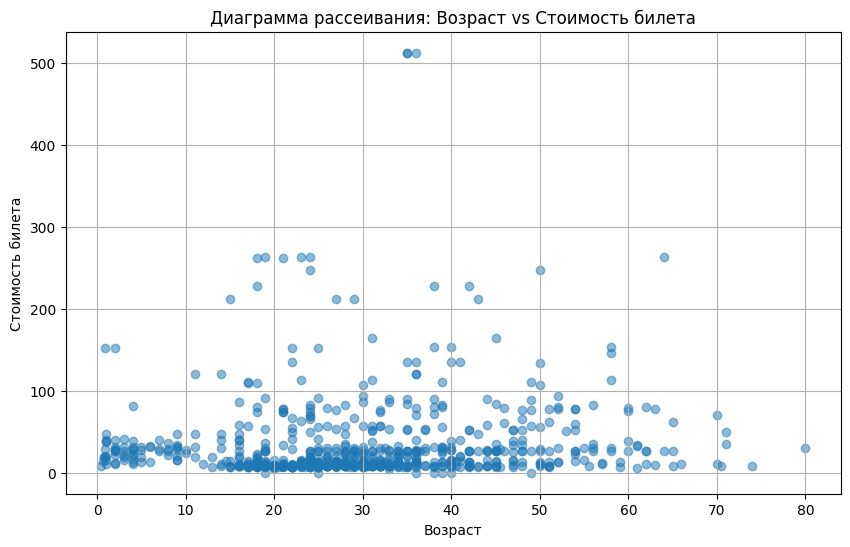

In [10]:
data = data.dropna(subset=['Age', 'Fare'])

plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Fare'], alpha=0.5)
plt.title('Диаграмма рассеивания: Возраст vs Стоимость билета')
plt.xlabel('Возраст')
plt.ylabel('Стоимость билета')
plt.grid()
plt.show()

По ней явно видны некоторые аномалии - несколько людей в возрасте от 30-40 лет купили билет стоимостью 500 фунтов. Скорее всего это были некоторые хорошо обеспеченные люди, поэтому нельзя назвать их выбросом в данных, а именно аномалией. 

Также эта диаграмма говорит нам о том, что как таковой зависимости в данных нет. Можно заметить небольшое горизонтальное разбиение на 3 слоя - 1 класс, 2 класс и 3 класс. У разных классов обслуживания цена на билеты отличается.

## Заключение

### Какая модель может использоваться для предсказания выживаемости пассажиров Титаника?

Так как при первичном анализе не обнаружено явных зависимостей данных (линейной, экспоненциальной и тд), то возможным вариантом модели, предсказывающей выживаемость пассажиров на Титанике, может стать модель Случайного леса.

Также перед началом обучения модели будет необходимо провести чистку данных -  а именно избавиться от колонки Cabin, так как она в большинстве своем имеет пустые данные, а также попробовать заменить пустые значения в колонке Age, используя метод ближайших соседей.

В результате данной работы был проведен первичный анализ некоторых признаков датасета, проанализированы некоторые зависимости в данных, сделаны выводы о возможной модели предсказывающей возможную выживаемость пассажиров Титаника, проведено исследование первичного датасета, сделаны выводы о будущей необходимости в заполнении некоторых пропусков в данных при начале обучения модели